# BIG 5 Classification model using the Fast AI Library


##Import libraries

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.7MB/s 
     |████████████████████████████████| 1.2MB 25.5MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 194kB 45.0MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 246kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
# pip install  torch==1.8.0

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from fastai.vision.widgets import *

#### Get the data from microsoft bing

In [ ]:
# MICROSOFT BING API KEY
key = os.environ.get('AZURE_SEARCH_KEY', 'SECRET')

In [ ]:
import os
if not os.path.exists('images'):
    os.makedirs('images')

In [ ]:
animal_types = 'elephant', 'rhinoceros ','lion', 'leopard', 'african buffalo'

In [ ]:
print(animal_types)

('elephant', 'rhinoceros ', 'lion', 'leopard', 'african buffalo')


In [ ]:
path = Path('images')
print(path)


images


In [ ]:
# save images function
def saveImages(o,dest):
  results = search_images_bing(key, o)
  print(results)
  ims = results.attrgot('content_url')
  len(ims)
  download_images(dest, urls=results.attrgot('contentUrl'))
  print(dest.ls())



In [ ]:
path = Path('images')
if not path.exists():
    path.mkdir()
for o in animal_types:
  # print(o)
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  print(dest)
  saveImages(o,dest)


images/elephant
[{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=elephant&id=B5001A0A3A6DDC40439B8FE73F63D5B30FE311E7&simid=608035011924660179', 'name': 'elephant | Description, Habitat, Scientific Names, Weight ...', 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.62Q4oad5rATMyv-m1SwdBQHaE6&pid=Api', 'datePublished': '2020-11-04T21:53:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://cdn.britannica.com/02/152302-050-1A984FCB/African-savanna-elephant.jpg', 'hostPageUrl': 'https://www.britannica.com/animal/elephant-mammal', 'contentSize': '234836 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://www.britannica.com/animal/elephant-mammal', 'width': 1600, 'height': 1062, 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.IPGZzMxQtH5VKX-nfGTeCQ&pid=Api', 'hostPageDomainFriendlyName': 'Britannica', 'hostPageDiscoveredDate': '2016-07-08T00:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 314}, 'imageInsightsToken': 'ccid_6

In [ ]:
# Show Images
for o in animal_types:
  path = Path('images',o)
  print(path.ls())
  # print(o)


[Path('images/elephant/00000085.gif'), Path('images/elephant/00000002.jpg'), Path('images/elephant/00000019.jpg'), Path('images/elephant/00000005.jpeg?w=1000&h=599&crop=1'), Path('images/elephant/00000132.jpg'), Path('images/elephant/00000139.jpg'), Path('images/elephant/00000078.jpg'), Path('images/elephant/00000142.jpg'), Path('images/elephant/00000113.jpg'), Path('images/elephant/00000136.jpg?itok=6vDQxuXr'), Path('images/elephant/00000001.jpg'), Path('images/elephant/00000086.jpg'), Path('images/elephant/00000026.jpg'), Path('images/elephant/00000068.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1200&h=1200&rect=&fit=crop&ixid=eyJhcHBfaWQiOjUyNDZ9'), Path('images/elephant/00000123.jpg'), Path('images/elephant/00000063.png'), Path('images/elephant/00000039.jpg'), Path('images/elephant/00000050.png'), Path('images/elephant/00000120.jpg'), Path('images/elephant/00000065.jpg'), Path('images/elephant/00000017.jpg'), Path('images/elephant/00000102.jpg'), Path('images/elephant/00000046.jpg'), 

### Delete invalid files





In [ ]:
# do until no failed images
for o in animal_types:
  path = Path('images',o)
  # print(path.ls())
  fns = get_image_files(path)
  failed = verify_images(fns)
  print(failed)
  failed.map(Path.unlink)

[]
[]
[]
[]
[]


# Build model

In [ ]:
bigFive = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
path = Path('images')
dls = bigFive.dataloaders(path)

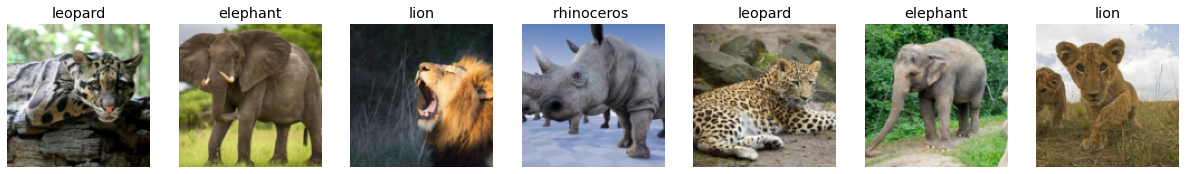

In [ ]:
# Show images
dls.valid.show_batch(max_n=7, nrows=1)

#Training Your Model

In [ ]:
bigFive = bigFive.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bigFive.dataloaders(path)

In [ ]:
print(dls)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.648617,0.275243,0.115942,00:28


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.219332,0.254546,0.094203,00:29
1,0.165245,0.295033,0.123188,00:29
2,0.116530,0.298003,0.115942,00:29
3,0.088006,0.261683,0.101449,00:29
4,0.070746,0.244820,0.094203,00:29


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

## Evaluating the model


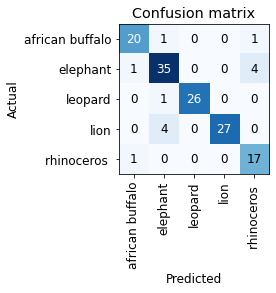

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## NOTES
This model performs fairly well. Further actions could be the following:

*   Clean up the input data
*   Use a bigger trained model like resnet50
*   Increase the number of epochs




## Export the model for production

In [ ]:
learn.export()

Let's check that the file exists, by using the `ls` method that fastai adds to Python's `Path` class:

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]